# KNN

**IMPORT LIBRARY**

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

**TRAINING**

Confusion Matrix (3x3):
 [[667   0   0]
 [  0 666   0]
 [  0   0 667]]

Classification Report:
               precision    recall  f1-score   support

      rendah       1.00      1.00      1.00       667
      sedang       1.00      1.00      1.00       666
      tinggi       1.00      1.00      1.00       667

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000


Distribusi label:
 late_payment_risk
tinggi    3334
sedang    3333
rendah    3333
Name: count, dtype: int64


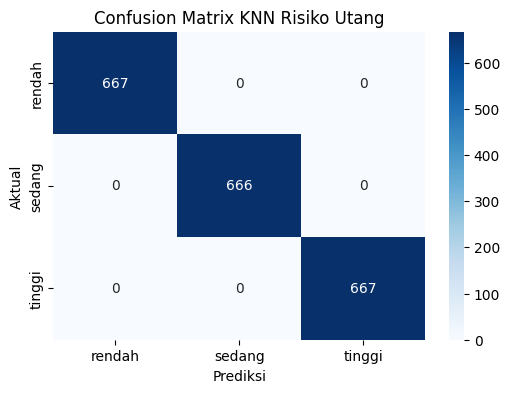

In [ ]:
# 1. Load dataset mentah
df = pd.read_csv("dataset.csv")

# 2. Hitung fitur turunan
df['credit_utilization_ratio'] = (df['total_debt'] / df['total_credit']) * 100
df['debt_to_income_ratio'] = (df['total_monthly_debt'] / df['income']) * 100
df['loan_to_value'] = (df['loan_amount'] / df['property_value']) * 100

df.dropna(subset=['late_payment_risk'], inplace=True)

# 3. Tentukan fitur dan label
X = df[['income', 'slik_ojk', 'credit_utilization_ratio', 'debt_to_income_ratio',
        'loan_to_value', 'loan_purpose', 'employment_status', 'job_tenure',
        'home_ownership', 'marital_status']]
y = df['late_payment_risk']  # label: 'rendah', 'sedang', 'tinggi'

# 4. Definisikan preprocessing
numeric_features = ['income', 'slik_ojk', 'credit_utilization_ratio',
                    'loan_to_value', 'job_tenure']
categorical_features = ['loan_purpose', 'employment_status',
                        'home_ownership', 'marital_status']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # debt_to_income_ratio tetap masuk tanpa scaling
)

# 5. Buat pipeline KNN
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=5))
])

# 6. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. Latih dan evaluasi model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# === Evaluasi model ===
cm = confusion_matrix(y_test, y_pred, labels=["rendah","sedang","tinggi"])
print("Confusion Matrix (3x3):\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=["rendah","sedang","tinggi"]))
print("\nDistribusi label:\n", df['late_payment_risk'].value_counts())

# === Visualisasi Confusion Matrix ===
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["rendah","sedang","tinggi"],
            yticklabels=["rendah","sedang","tinggi"])
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix KNN Risiko Utang")
plt.show()

**TESTING**

In [7]:
# 8. Input data testing manual
data_baru = pd.DataFrame([
    {
        'income': 9,
        'slik_ojk': 3,
        'total_debt': 45,
        'total_credit': 80,
        'total_monthly_debt': 5,
        'loan_amount': 100,
        'property_value': 150,
        'loan_purpose': 'KPR',
        'employment_status': 'kontrak',
        'job_tenure': 6,
        'home_ownership': 'sewa',
        'marital_status': 'menikah'
    }
])

# data_baru = pd.DataFrame([{
#     'income': 6,
#     'slik_ojk': 2,
#     'total_debt': 30,
#     'total_credit': 50,
#     'total_monthly_debt': 3.5,
#     'loan_amount': 80,
#     'property_value': 120,
#     'loan_purpose': 'Kredit Kendaraan',
#     'employment_status': 'kontrak',
#     'job_tenure': 12,
#     'home_ownership': 'sewa',
#     'marital_status': 'lajang'
# }])

# data_baru = pd.DataFrame([{
#     'income': 1,
#     'slik_ojk': 5,
#     'total_debt': 60,
#     'total_credit': 5,
#     'total_monthly_debt': 4.5,
#     'loan_amount': 120,
#     'property_value': 13,
#     'loan_purpose': 'Modal Kerja/Usaha',
#     'employment_status': 'freelance',
#     'job_tenure': 2,
#     'home_ownership': 'tinggal bersama ortu',
#     'marital_status': 'cerai'
# }])

# Hitung fitur turunan
data_baru['credit_utilization_ratio'] = (data_baru['total_debt'] / data_baru['total_credit']) * 100
data_baru['debt_to_income_ratio'] = (data_baru['total_monthly_debt'] / data_baru['income']) * 100
data_baru['loan_to_value'] = (data_baru['loan_amount'] / data_baru['property_value']) * 100

# Ambil fitur yang dibutuhkan
data_testing = data_baru[['income', 'slik_ojk', 'credit_utilization_ratio', 'debt_to_income_ratio',
                          'loan_to_value', 'loan_purpose', 'employment_status', 'job_tenure',
                          'home_ownership', 'marital_status']]

# Prediksi risiko
hasil_prediksi = pipeline.predict(data_testing)[0]
print(f"\nPrediksi risiko keterlambatan untuk data_baru: {hasil_prediksi}")


Prediksi risiko keterlambatan untuk data_baru: sedang
